# KNN Assignment

In [446]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [448]:
x = pd.read_csv('./Training Data/Diabetes_XTrain.csv')
y = pd.read_csv('./Training Data/Diabetes_YTrain.csv')
xTest = pd.read_csv('./Testing Data/Diabetes_XTest.csv')


<Axes: xlabel='Outcome'>

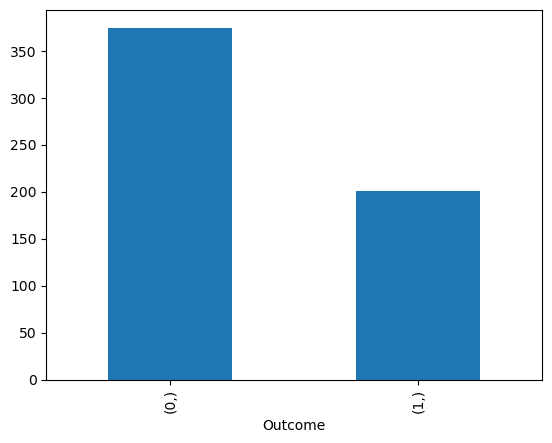

In [450]:
y.value_counts().plot(kind='bar')

In [452]:
for col in xTest.columns[1:6]:
    xTest[col] = xTest[col].replace(0, np.nan)
    xTest[col] = xTest[col].fillna(int(xTest[col].mean(skipna=True)))


In [454]:
x = x.values
y = y.values
y = y.reshape((-1, ))
test = xTest.values


In [456]:
def distance(x1, x2):
    return np.sqrt(sum((x1-x2)**2))

In [458]:
def knn(x, y, querypoint, k = 5):
    vals = []
    for i in range(x.shape[0]):
        d  =distance(querypoint, x[i])
        vals.append((d, y[i]))
    vals = sorted(vals)
    vals = np.array(vals)
    new_val = np.unique(vals[1], return_counts = True)
    print(new_val)
    index = new_val[1].argmax()
    pred = new_val[0][index]
    return pred

In [464]:
output = []
for i in range(test.shape[0]):
    output.append(knn(x, y, test[i]))
xTest['Outcome'] = output
xTest[:10]

(array([ 1.       , 34.1177983]), array([1, 1], dtype=int64))
(array([ 0.        , 18.89876017]), array([1, 1], dtype=int64))
(array([ 0.        , 12.67165344]), array([1, 1], dtype=int64))
(array([ 0.        , 31.34820084]), array([1, 1], dtype=int64))
(array([ 0.        , 14.36792553]), array([1, 1], dtype=int64))
(array([ 1.        , 33.49991058]), array([1, 1], dtype=int64))
(array([ 1.        , 29.17091874]), array([1, 1], dtype=int64))
(array([ 0.        , 19.48592405]), array([1, 1], dtype=int64))
(array([ 0.        , 25.43147782]), array([1, 1], dtype=int64))
(array([ 1.        , 21.01378407]), array([1, 1], dtype=int64))
(array([ 1.        , 17.41501938]), array([1, 1], dtype=int64))
(array([ 0.        , 16.39403016]), array([1, 1], dtype=int64))
(array([ 1.        , 45.64421594]), array([1, 1], dtype=int64))
(array([ 0.        , 10.12028661]), array([1, 1], dtype=int64))
(array([ 1.        , 18.30492054]), array([1, 1], dtype=int64))
(array([ 0.       , 18.6085576]), array([1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,180.0,90.0,26.0,90.0,36.5,0.314,35,1.0
1,2,93.0,64.0,32.0,160.0,38.0,0.674,23,0.0
2,2,114.0,68.0,22.0,181.0,28.7,0.092,25,0.0
3,13,76.0,60.0,29.0,181.0,32.8,0.180,41,0.0
4,1,80.0,74.0,11.0,60.0,30.0,0.527,22,0.0
5,5,137.0,108.0,29.0,181.0,48.8,0.227,37,1.0
6,1,153.0,82.0,42.0,485.0,40.6,0.687,23,1.0
7,6,98.0,58.0,33.0,190.0,34.0,0.430,43,0.0
8,2,92.0,62.0,28.0,181.0,31.6,0.130,24,0.0
9,3,111.0,56.0,39.0,181.0,30.1,0.557,30,1.0


In [462]:
xTest.to_csv('pred.csv')

In [374]:
xTest

array([[0.00e+00, 1.80e+02, 9.00e+01, ..., 3.65e+01, 3.14e-01, 3.50e+01],
       [2.00e+00, 9.30e+01, 6.40e+01, ..., 3.80e+01, 6.74e-01, 2.30e+01],
       [2.00e+00, 1.14e+02, 6.80e+01, ..., 2.87e+01, 9.20e-02, 2.50e+01],
       ...,
       [0.00e+00, 1.62e+02, 7.60e+01, ..., 4.96e+01, 3.64e-01, 2.60e+01],
       [1.20e+01, 8.40e+01, 7.20e+01, ..., 2.97e+01, 2.97e-01, 4.60e+01],
       [0.00e+00, 9.40e+01, 0.00e+00, ..., 0.00e+00, 2.56e-01, 2.50e+01]])

In [386]:
xTest

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,180.0,90.0,26.0,90.0,36.5,0.314,35
1,2,93.0,64.0,32.0,160.0,38.0,0.674,23
2,2,114.0,68.0,22.0,181.0,28.7,0.092,25
3,13,76.0,60.0,29.0,181.0,32.8,0.180,41
4,1,80.0,74.0,11.0,60.0,30.0,0.527,22
...,...,...,...,...,...,...,...,...
187,10,108.0,66.0,29.0,181.0,32.4,0.272,42
188,3,130.0,64.0,29.0,181.0,23.1,0.314,22
189,0,162.0,76.0,36.0,181.0,49.6,0.364,26
190,12,84.0,72.0,31.0,181.0,29.7,0.297,46
